In [1]:
from pandas import read_csv
from pandas import to_datetime, DataFrame
from prophet import Prophet
from pandas import read_csv, date_range
from pandas import to_datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from pandas import read_csv
from matplotlib import pyplot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the car sales dataset

# load data
path = r"/content/drive/MyDrive/MTech Internship/bopal_solar_insolation_2016_2022_final.csv"

df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())
print(df['ghi'].max(), df['ghi'].min())

# df.plot()
# pyplot.show()

(66482, 2)
       date_time     ghi
0  1/1/2016 7:00   0.000
1  1/1/2016 7:30   0.000
2  1/1/2016 8:00   0.000
3  1/1/2016 8:30   0.000
4  1/1/2016 9:00  63.336
1001.75 0.0


In [4]:
# prepare expected column names

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [5]:
# fit prophet model on the car sales dataset

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'], format='%d-%m-%Y %H:%M', errors='coerce')
# define the model
model = Prophet(
    seasonality_mode="multiplicative",  # Suitable for fluctuating data
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.1,  # Moderate flexibility in trend
)
# fit the model
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp39_ffnnf/pt_8sng1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp39_ffnnf/mifg4xru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59715', 'data', 'file=/tmp/tmp39_ffnnf/pt_8sng1.json', 'init=/tmp/tmp39_ffnnf/mifg4xru.json', 'output', 'file=/tmp/tmp39_ffnnf/prophet_models6fye2wz/prophet_model-20250309105257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model = Prophet(
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.2,  # More flexibility for trend shifts
)

# Add fine-tuned seasonalities
model.add_seasonality(name="daily", period=1, fourier_order=30)
model.add_seasonality(name="weekly", period=7, fourier_order=10)
model.add_seasonality(name="yearly", period=365.25, fourier_order=20)

# Add monsoon period as a regressor
df["monsoon"] = df["ds"].apply(lambda x: 1 if x.month in [6, 7, 8, 9] else 0)
model.add_regressor("monsoon")
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjv0thkfb/a0vddh4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjv0thkfb/dikyc2au.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49147', 'data', 'file=/tmp/tmpjv0thkfb/a0vddh4k.json', 'init=/tmp/tmpjv0thkfb/dikyc2au.json', 'output', 'file=/tmp/tmpjv0thkfb/prophet_modelj5zwnqg9/prophet_model-20250303084742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:47:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


KeyboardInterrupt: 

In [ ]:
from scipy.stats import uniform


param_space = dict(growth = ['linear', 'logistic', 'flat'],
                   n_changepoints  = range(0, 55, 5),
                   changepoint_range  = uniform(0.5, 0.5),
                   yearly_seasonality = [True, False],
                   weekly_seasonality = [True, False],
                   daily_seasonality = [True, False],
                   seasonality_mode = ['additive', 'multiplicative'],
                   seasonality_prior_scale=uniform(5.0, 15.0),
                   changepoint_prior_scale=uniform(0.0, 0.1),
                   interval_width = uniform(0.2, 0.8),
                   uncertainty_samples = [500, 1000, 1500, 2000]
                   )

In [ ]:
!pip install mango

In [ ]:
from prophet import Prophet
from mango.tuner import Tuner


def objective_function(args_list):
    global train_df, test_df

    params_evaluated = []
    results = []

    for params in args_list:
        try:
            model = Prophet(**params)
            model.fit(train_df)
            future = model.make_future_dataframe(periods=Test_size, freq='M')
            forecast = model.predict(future)
            predictions_tuned = forecast.tail(Test_size)
            error = mape(test_df['y'], predictions_tuned['yhat'])

            params_evaluated.append(params)
            results.append(error)
        except:
            #print(f"Exception raised for {params}")
            #pass
            params_evaluated.append(params)
            results.append(25.0)# Giving high loss for exceptions regions of spaces

        #print(params_evaluated, mse)
    return params_evaluated, results

ModuleNotFoundError: No module named 'mango.tuner'

In [14]:
# Start and end dates
start_date = '2022-12-29'
end_date = '2022-12-31'

# Create a date range with half-hourly intervals
full_date_range = date_range(start=start_date, end=end_date, freq='30min')

In [15]:
# # define the period for which we want a prediction
# future = list()
# for i in range(1, 13):
#   date = '2025-%02d' % i
#   future.append([date])
# future = DataFrame(future)
# future.columns = ['ds']
# future['ds']= to_datetime(future['ds'])
# print(future.head())

future = []
for date in full_date_range:
    # Extract the time part
    time = date.strftime('%H:%M')

    # Check if the time is within the desired range (7 am to 7:30 pm)
    if '07:00' <= time <= '19:30':  # 19:30 is 7:30 PM in 24-hour format
        future.append([date])

future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
print(future.head())

                   ds
0 2022-12-29 07:00:00
1 2022-12-29 07:30:00
2 2022-12-29 08:00:00
3 2022-12-29 08:30:00
4 2022-12-29 09:00:00


In [10]:
forecast = model.predict(future)
# forecast = model.predict(df)

In [ ]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(15))

# plot forecast


                    ds        yhat  yhat_lower  yhat_upper
0  2022-07-25 07:00:00  -63.283667 -232.525537   84.872174
1  2022-07-25 07:30:00  -39.215105 -195.726965  120.324723
2  2022-07-25 08:00:00    5.577558 -162.676045  155.428151
3  2022-07-25 08:30:00   71.617117  -85.151578  233.102422
4  2022-07-25 09:00:00  154.727974   -4.974467  304.646577
5  2022-07-25 09:30:00  247.416684   97.970789  397.626210
6  2022-07-25 10:00:00  340.859698  191.615949  504.303798
7  2022-07-25 10:30:00  426.918603  264.877664  585.066306
8  2022-07-25 11:00:00  499.649194  348.630082  669.970532
9  2022-07-25 11:30:00  555.960325  393.546656  717.968990
10 2022-07-25 12:00:00  595.352472  423.989338  756.344578
11 2022-07-25 12:30:00  618.943601  459.989886  777.799493
12 2022-07-25 13:00:00  628.191789  465.244712  790.303533
13 2022-07-25 13:30:00  623.794074  469.958823  790.852186
14 2022-07-25 14:00:00  605.161678  453.783369  764.920812


In [19]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-4160:-4108])
print(train)

                       ds        y
0     2016-01-01 07:00:00   0.0000
1     2016-01-01 07:30:00   0.0000
2     2016-01-01 08:00:00   0.0000
3     2016-01-01 08:30:00   0.0000
4     2016-01-01 09:00:00  63.3360
...                   ...      ...
66477 2022-12-31 17:30:00  42.6733
66478 2022-12-31 18:00:00   0.0000
66479 2022-12-31 18:30:00   0.0000
66480 2022-12-31 19:00:00   0.0000
66481 2022-12-31 19:30:00   0.0000

[66430 rows x 2 columns]


In [20]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-4160:-4108].values
y_pred = forecast['yhat'].values
print(y_true.shape)
print(y_pred.shape)
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)
rmse = root_mean_squared_error(y_true, y_pred)
print('RMSE: %.3f' % rmse)

(52,)
(52,)
MAE: 203.910
MSE: 61213.835
RMSE: 247.414


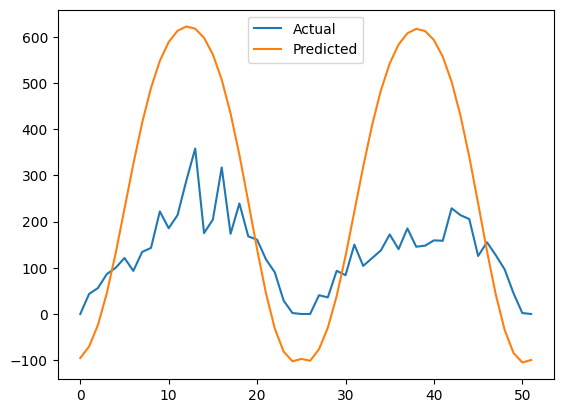

In [21]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()